In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
import itertools
import statsmodels.formula.api as smf
import sys
import time
import requests
# Plotting packages
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns
import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings
import string
import datetime
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from io import BytesIO
from sklearn.metrics import mean_absolute_error, mean_squared_error

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Data pre-processing</span>

In [2]:

file_path = '../../../data/raw/flight-bridgeport-year.xls'

# Read the Excel file into a dictionary of DataFrames, with sheet names as keys
dfs = pd.read_excel(file_path, sheet_name=None)

# Define a function to extract data from rows 6-7 in the column "Unnamed: 11" for each sheet
def extract_data(df):
    try:
        # Extract data from rows 6-7 in the column "Unnamed: 11"
        data = df.loc[6:7, "Unnamed: 11"]
        # Sum the extracted numbers
        summation = data.sum()
        return data, summation
    except KeyError:
        print("Column 'Unnamed: 11' not found in DataFrame")
        return None, None
    except IndexError:
        print("Rows 6-7 not found in DataFrame")
        return None, None

# Extract data from each sheet and store in a dictionary
extracted_data = {sheet_name: extract_data(sheet_df) for sheet_name, sheet_df in dfs.items()}

# Access data for the sheet '2022'
data_2022, summation_2022_b = extracted_data['2022']
data_2021, summation_2021_b = extracted_data['2021']
data_2020, summation_2020_b = extracted_data['2020']
data_2019, summation_2019_b = extracted_data['2019']
data_2018, summation_2018_b = extracted_data['2018']
data_2017, summation_2017_b = extracted_data['2017']
data_2016, summation_2016_b = extracted_data['2016']
data_2015, summation_2015_b = extracted_data['2015']
data_2014, summation_2014_b = extracted_data['2014']
data_2013, summation_2013_b = extracted_data['2013']
data_2012, summation_2012_b = extracted_data['2012']
data_2011, summation_2011_b = extracted_data['2011']
data_2010, summation_2010_b = extracted_data['2010']

In [3]:
# Provide the file path to your Excel file
file_path = '../../../data/raw/flight-hartford-year.xls'

# Read the Excel file into a dictionary of DataFrames, with sheet names as keys
dfs = pd.read_excel(file_path, sheet_name=None)

# Define a function to extract data from rows 6-7 in the column "Unnamed: 11" for each sheet
def extract_data(df):
    try:
        # Extract data from rows 6-7 in the column "Unnamed: 11"
        data = df.loc[6:11, "Unnamed: 11"]
        # Sum the extracted numbers
        summation = data.sum()
        return data, summation
    except KeyError:
        print("Column 'Unnamed: 11' not found in DataFrame")
        return None, None
    except IndexError:
        print("Rows 6-7 not found in DataFrame")
        return None, None

# Extract data from each sheet and store in a dictionary
extracted_data = {sheet_name: extract_data(sheet_df) for sheet_name, sheet_df in dfs.items()}

# Access data for the sheet '2022'
data_2022, summation_2022_h = extracted_data['2022']
data_2021, summation_2021_h = extracted_data['2021']
data_2020, summation_2020_h = extracted_data['2020']
data_2019, summation_2019_h = extracted_data['2019']
data_2018, summation_2018_h = extracted_data['2018']
data_2017, summation_2017_h = extracted_data['2017']
data_2016, summation_2016_h = extracted_data['2016']
data_2015, summation_2015_h = extracted_data['2015']
data_2014, summation_2014_h = extracted_data['2014']
data_2013, summation_2013_h = extracted_data['2013']
data_2012, summation_2012_h = extracted_data['2012']
data_2011, summation_2011_h = extracted_data['2011']
data_2010, summation_2010_h = extracted_data['2010']

In [4]:
# Provide the file path to your Excel file
file_path = '../../../data/raw/flight-NewHaven-year.xls'

# Read the Excel file into a dictionary of DataFrames, with sheet names as keys
dfs = pd.read_excel(file_path, sheet_name=None)

# Define a function to extract data from rows 6-7 in the column "Unnamed: 11" for each sheet
def extract_data(df):
    try:
        # Extract data from rows 6-7 in the column "Unnamed: 11"
        data = df.loc[6:9, "Unnamed: 11"]
        # Sum the extracted numbers
        summation = data.sum()
        return data, summation
    except KeyError:
        print("Column 'Unnamed: 11' not found in DataFrame")
        return None, None
    except IndexError:
        print("Rows 6-7 not found in DataFrame")
        return None, None

# Extract data from each sheet and store in a dictionary
extracted_data = {sheet_name: extract_data(sheet_df) for sheet_name, sheet_df in dfs.items()}

# Access data for the sheet '2022'
data_2022, summation_2022_n = extracted_data['2022']
data_2021, summation_2021_n = extracted_data['2021']
data_2020, summation_2020_n = extracted_data['2020']
data_2019, summation_2019_n = extracted_data['2019']
data_2018, summation_2018_n = extracted_data['2018']
data_2017, summation_2017_n = extracted_data['2017']
data_2016, summation_2016_n = extracted_data['2016']
data_2015, summation_2015_n = extracted_data['2015']
data_2014, summation_2014_n = extracted_data['2014']
data_2013, summation_2013_n = extracted_data['2013']
data_2012, summation_2012_n = extracted_data['2012']
data_2011, summation_2011_n = extracted_data['2011']
data_2010, summation_2010_n = extracted_data['2010']

In [5]:
# Create lists for each column using the summation values
years = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']
new_haven_emissions = [summation_2022_n, summation_2021_n, summation_2020_n, summation_2019_n, summation_2018_n, summation_2017_n, summation_2016_n, summation_2015_n, summation_2014_n, 
                       summation_2013_n, summation_2012_n, summation_2011_n, summation_2010_n]
hartford_emissions = [summation_2022_h, summation_2021_h, summation_2020_h, summation_2019_h, summation_2018_h, summation_2017_h, summation_2016_h, summation_2015_h, summation_2014_h, 
                       summation_2013_h, summation_2012_h, summation_2011_h, summation_2010_h]
bridgeport_emissions = [summation_2022_b, summation_2021_b, summation_2020_b, summation_2019_b, summation_2018_b, summation_2017_b, summation_2016_b, summation_2015_b, summation_2014_b, 
                       summation_2013_b, summation_2012_b, summation_2011_b, summation_2010_b]
# Create a dictionary from the lists
data = {
    'Year': years,
    'New Haven emissions (MMTCO2e)': new_haven_emissions,
    'Hartford emissions (MMTCO2e)': hartford_emissions,
    'Bridgeport emissions (MMTCO2e)': bridgeport_emissions
}

# Create the DataFrame
df = pd.DataFrame(data)



# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Flip the DataFrame vertically
df_flipped = df[::-1] 


# Convert index to datetime
df_flipped.index = pd.to_datetime(df_flipped.index, format='%Y')

# Optionally, you can set the frequency to annual
df_flipped.index.freq = 'AS'

df_flipped=df_flipped/1000000
df_flipped.to_csv('../../../data/tidy/industrial-emissions-paper.csv')
df_flipped

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14940\2108125992.py:33: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  df_flipped.index.freq = 'AS'


,New Haven emissions (MMTCO2e),Hartford emissions (MMTCO2e),Bridgeport emissions (MMTCO2e)
Year,,,
2010-01-01,0.217480,0.195362,0.065504
2011-01-01,0.175600,0.288440,0.084405
2012-01-01,0.177850,0.228309,0.105455
2013-01-01,0.172299,0.210283,0.106883
2014-01-01,0.165120,0.221517,0.108744
2015-01-01,0.182678,0.219378,0.106436
2016-01-01,0.170831,0.288883,0.099643
2017-01-01,0.275824,0.303876,0.108420
2018-01-01,0.268418,0.299122,0.103251


<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Data visualization</span>

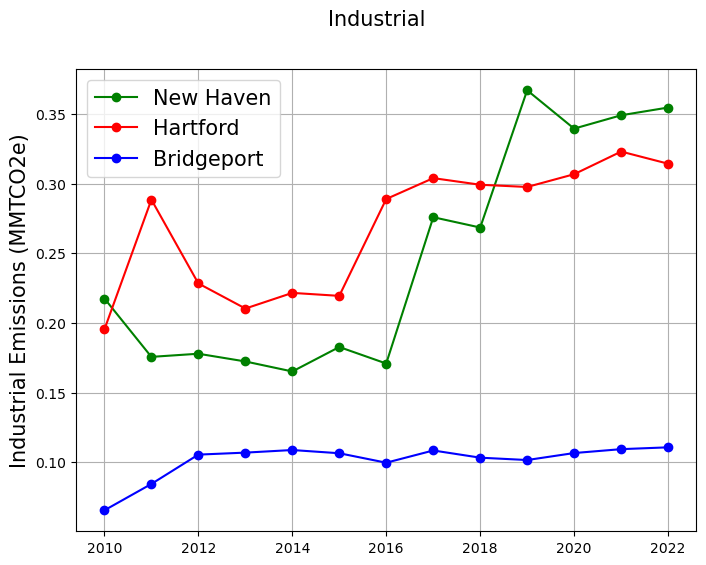

In [6]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('Industrial',fontsize=15)
actual, = plt.plot(df_flipped.index, df_flipped ['New Haven emissions (MMTCO2e)'], 'go-', label='New Haven')
actual, = plt.plot(df_flipped.index, df_flipped ['Hartford emissions (MMTCO2e)'], 'ro-', label='Hartford')
actual, = plt.plot(df_flipped.index, df_flipped ['Bridgeport emissions (MMTCO2e)'], 'bo-', label='Bridgeport')
#plt.xlabel('Year',fontsize=18)
plt.ylabel('Industrial Emissions (MMTCO2e)',fontsize=15)
#plt.xticks(np.arange(min(electr_residential.index), max(electr_residential.index)+1, 1)) 
plt.legend(fontsize=15)
plt.grid()
#plt.savefig('images/avetemp.png',bbox_inches='tight')|
plt.savefig('../../../figures/industrial-emissions.png', dpi=600, bbox_inches='tight')

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Identify the stationarity</span>

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Data split and ARIMA model </span>

In [7]:
split_index = round(len(df_flipped)*0.8)
df_train = df_flipped.iloc[:split_index].copy()
df_test = df_flipped.iloc[split_index:].copy()

df_train.index.freq = 'AS'
df_test.index.freq = 'AS'

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14940\1779749120.py:5: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  df_train.index.freq = 'AS'
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14940\1779749120.py:6: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  df_test.index.freq = 'AS'


In [8]:
len(df_train)

10

In [9]:
len(df_test)

3

In [10]:
HEM_data = df_flipped['Hartford emissions (MMTCO2e)'].astype(float)
NHM_data = df_flipped['New Haven emissions (MMTCO2e)'].astype(float)
BSN_data = df_flipped['Bridgeport emissions (MMTCO2e)'].astype(float)


warnings.filterwarnings("ignore")

def performance_metric(test, forecast):#observed and predicted
    """
    Evaluate forecast using different metrics.
    """
    mape = np.mean(np.abs((test - forecast) / test)) * 100
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    return mape, mae, rmse

def arima_prediction(train, test, order):
    # Fit the SARIMA model with the optimal parameters
    mod = sm.tsa.arima.ARIMA(train, order=order, enforce_stationarity=False, enforce_invertibility=False, concentrate_scale=False)
    res = mod.fit()
    
    # Generate predictions for the test set
    pred = res.get_prediction(start=len(train), end=len(train) + len(test) - 1)
    pred_mean = pred.predicted_mean
    
    # Evaluate forecast
    mape, mae, rmse = performance_metric(test, pred_mean)
    
    # Calculate BIC and AIC
    bic = res.bic
    #aic = res.aic
    
    return mape, mae, rmse, bic

def gridsearch(data): 

    # Initialize list to store results
    results_list_cv = []

    p_values = range(0,8)
    d_values = range(1,2)
    q_values = range(0,8)

    # Loop through each combination of p, d, q values
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                mape_cv = []
                mae_cv = []
                rmse_cv = []
                bic_cv = []
            

                split_index = round(len(data)*0.8)
                train = data.iloc[:split_index].copy()
                test = data.iloc[split_index:].copy()

                mape, mae, rmse, bic = arima_prediction(train, test, order)
                mape_cv.append(mape)
                mae_cv.append(mae)
                rmse_cv.append(rmse)
                bic_cv.append(bic)
                    #aic_cv.append(aic)
                    


                # Calculate the mean of metrics across folds
                mape_mean = np.mean(mape_cv)
                mae_mean = np.mean(mae_cv)
                rmse_mean = np.mean(rmse_cv)
                bic_mean = np.mean(bic_cv)
                #aic_mean = np.mean(aic_cv)

                # Store results
                results_list_cv.append({'p': p, 'd': d, 'q': q, 'MAPE': mape_mean, 'MAE': mae_mean, 'RMSE': rmse_mean, 'BIC':bic_mean})

    # Convert list of dictionaries to DataFrame
    results_df = pd.DataFrame(results_list_cv)
    return results_df


            
# Convert list of dictionaries to DataFrame
results_df_HEM_cv=gridsearch(HEM_data)
results_df_NHM_cv=gridsearch(NHM_data)
results_df_BSN_cv=gridsearch(BSN_data)

print(results_df_HEM_cv)

    p  d  q       MAPE       MAE      RMSE        BIC
0   0  1  0   5.387281  0.017082  0.018328 -29.403064
1   0  1  1   5.425418  0.017202  0.018440 -26.667764
2   0  1  2   6.126620  0.019407  0.020509 -20.061753
3   0  1  3   5.890599  0.018671  0.019925 -13.966704
4   0  1  4  12.806951  0.040464  0.041461  -8.798614
.. .. .. ..        ...       ...       ...        ...
59  7  1  3   5.131919  0.016278  0.017608 -34.333136
60  7  1  4   5.131841  0.016278  0.017608 -33.013823
61  7  1  5   5.130391  0.016274  0.017603 -24.353180
62  7  1  6   5.131884  0.016278  0.017608 -32.395238
63  7  1  7   5.470563  0.017343  0.018566 -21.979736

[64 rows x 7 columns]


In [11]:
test_HEM =results_df_HEM_cv.set_index(['p','d','q'])#.loc[:,'RMSE'].idxmin()
sorted_HEM=test_HEM.sort_values(by='RMSE').iloc[:60,:]
HEM = sorted_HEM.applymap(lambda x: f'{x:.3f}')
HEM

MAPE    MAE   RMSE      BIC
p d q                               
1 1 4   1.537  0.005  0.005   -8.625
2 1 2   2.523  0.008  0.009  -16.990
    4   2.625  0.008  0.010   -8.822
6 1 6   5.084  0.016  0.017  -23.340
7 1 5   5.130  0.016  0.018  -24.353
    0   5.132  0.016  0.018  -36.831
    4   5.132  0.016  0.018  -33.014
    6   5.132  0.016  0.018  -32.395
    3   5.132  0.016  0.018  -34.333
    2   5.132  0.016  0.018  -35.092
    1   5.132  0.016  0.018  -39.345
2 1 7   5.210  0.017  0.018  -16.079
    6   5.262  0.017  0.018  -19.078
5 1 6   5.332  0.017  0.018  -25.932
1 1 6   5.284  0.017  0.018  -28.286
    0   5.291  0.017  0.018  -28.111
3 1 6   5.309  0.017  0.018  -23.435
2 1 0   5.322  0.017  0.018  -24.818
3 1 5   5.319  0.017  0.018  -38.142
2 1 5   5.334  0.017  0.018  -38.169
    1   5.348  0.017  0.018  -22.880
3 1 0   5.350  0.017  0.018  -18.198
1 1 5   5.381  0.017  0.018  -45.903
0 1 0   5.387  0.017  0.018  -29.403
    7   5.389  0.017  0.018  -17.705
4 1 6   5.403  0.017  0.018  -27.692
0 1 6   5.420  0.017  0.018  -41.918
    1   5.425  0.017  0.018  -26.668
4 1 7   5.438  0.017  0.018  -18.042
6 1 7   5.428  0.017  0.018  -20.559
1 1 1   5.444  0.017  0.018  -24.737
3 1 7   5.459  0.017  0.019  -18.681
1 1 7   5.459  0.017  0.019  -12.997
7 1 7   5.471  0.017  0.019  -21.980
0 1 5   5.472  0.017  0.019  -40.393
5 1 7   5.494  0.017  0.019  -20.732
6 1 2   5.571  0.018  0.020  -57.604
    5   5.574  0.018  0.020  -45.070
    0   5.574  0.018  0.020  -69.465
    1   5.574  0.018  0.020  -59.156
    3   5.575  0.018  0.020  -53.105
    4   5.576  0.018  0.020  -49.962
0 1 3   5.891  0.019  0.020  -13.967
    2   6.127  0.019  0.021  -20.062
4 1 5   6.115  0.019  0.021  -28.488
2 1 3   6.594  0.021  0.021  -13.805
3 1 1   7.065  0.022  0.023  -17.893
1 1 2   7.248  0.023  0.023  -18.424
5 1 5   6.992  0.022  0.024  -22.895
1 1 3   9.635  0.030  0.031  -12.538
0 1 4  12.807  0.040  0.041   -8.799
4 1 3  13.035  0.041  0.042  -18.652
    2  13.498  0.043  0.043  -18.850
3 1 3  15.304  0.048  0.048  -14.681
4 1 1  15.761  0.050  0.051  -17.914
5 1 0  18.284  0.058  0.058  -88.931
    3  18.302  0.058  0.058  -55.629
    4  18.495  0.058  0.059  -50.623
3 1 2  17.980  0.057  0.059  -17.386
5 1 1  18.704  0.059  0.059  -43.867

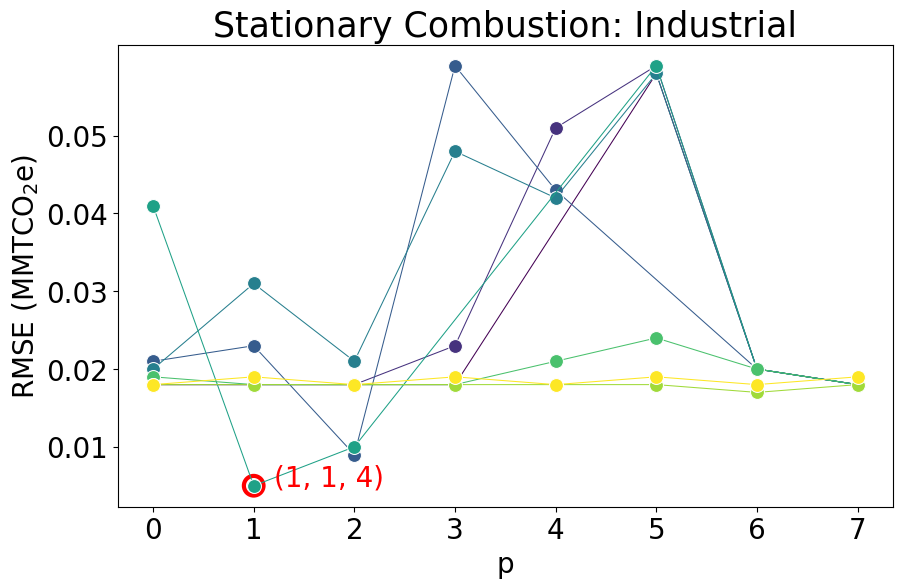

In [12]:
import seaborn as sns

HEM['RMSE'] = pd.to_numeric(HEM['RMSE'], errors='coerce')

# Check for non-numeric values in 'RMSE' column
non_numeric_values = HEM['RMSE'][HEM['RMSE'].apply(lambda x: not np.issubdtype(type(x), np.number))]
plt.figure(figsize=(10, 6))

# Using seaborn scatterplot to plot data with different sizes and colors for d and q
sns.lineplot(
    data=HEM,
    x='p', 
    y='RMSE', 
    size='d', 
    hue='q', 
    palette='viridis', 
    markers=True,
    style='d',
    legend=False,
    markersize=10
)

# Adding labels and title
plt.title('Stationary Combustion: Industrial',fontsize =25)
plt.xlabel('p',fontsize=20)
plt.ylabel('RMSE (MMTCO$_2$e)',fontsize=20)

plt.xticks(range(8), fontsize=20)

# # Customize the y-ticks
y_ticks = np.arange(0, 40, 5)  # Create y-ticks with a step of 0.5
plt.yticks(ticks=y_ticks, fontsize=20)  # Set y-ticks and their fontsize

maximum = HEM['RMSE'].max()
y_ticks = np.arange(0, maximum, 0.01)  # Create y-ticks with a step of 0.02
plt.yticks(ticks=y_ticks, fontsize=20)  # Set y-ticks and their fontsize

highlight = HEM.loc[1, 1, 4]
p, d, q = 1, 1, 4  # The index values for annotation
plt.scatter(p, highlight['RMSE'], facecolors='none', edgecolors='red', s=200, linewidth=3)
plt.text(p + 0.2, highlight['RMSE'], f'({p}, {d}, {q})', fontsize=20, color='red')

plt.savefig('../../../figures/rmse-plot/stationary_industrial_emissions_HEM.jpg', dpi=600, bbox_inches='tight')

In [13]:
test_NHM =results_df_NHM_cv.set_index(['p','d','q'])#.loc[:,'RMSE'].idxmin()
sorted_NHM=test_NHM.sort_values(by='RMSE').iloc[:60,:]
NHM = sorted_NHM.applymap(lambda x: f'{x:.3f}')
NHM

MAPE    MAE   RMSE      BIC
p d q                                
1 1 0    1.065  0.004  0.005  -20.843
    7    1.874  0.006  0.008   -1.808
0 1 1    3.121  0.011  0.012  -16.890
    0    5.580  0.019  0.020  -22.639
1 1 4    5.542  0.019  0.023   -5.075
6 1 3    7.230  0.025  0.025   -9.130
    5    8.131  0.028  0.029  -28.537
    1    8.266  0.029  0.029  -28.150
    0    8.567  0.030  0.030  -42.467
2 1 3    7.111  0.025  0.031   -8.559
0 1 3    8.793  0.031  0.031  -10.012
1 1 3    8.456  0.030  0.032  -10.011
6 1 2   10.009  0.035  0.036  -24.785
0 1 2   10.189  0.035  0.036  -15.556
    4   12.362  0.043  0.044   -5.941
1 1 1   12.864  0.045  0.048  -16.499
5 1 6   12.988  0.045  0.050  -11.827
3 1 6   13.449  0.047  0.051  -18.821
6 1 6   13.230  0.046  0.052  -12.589
2 1 4   13.308  0.047  0.053   -4.406
4 1 6   13.832  0.048  0.053  -13.581
0 1 5   14.524  0.051  0.054   -2.834
2 1 6   14.750  0.052  0.055  -20.324
3 1 7   13.051  0.046  0.057  -16.756
1 1 5   15.926  0.056  0.059   -1.853
6 1 4   15.856  0.055  0.059  -18.131
1 1 6   15.553  0.054  0.059   -6.244
2 1 5   16.269  0.057  0.060   -1.263
0 1 6   16.050  0.056  0.061   -6.648
7 1 7   13.905  0.049  0.063  -16.693
6 1 7   13.969  0.049  0.063  -12.873
5 1 7   13.980  0.049  0.063  -17.392
7 1 1   14.931  0.052  0.065   -4.439
4 1 7   14.826  0.052  0.065  -14.687
2 1 1   17.246  0.060  0.070  -18.521
    0   17.247  0.060  0.070  -20.467
7 1 4   16.908  0.059  0.071  -29.101
2 1 7   17.774  0.062  0.072  -15.375
7 1 6   18.018  0.063  0.074  -27.316
    5   19.011  0.067  0.078  -27.333
    0   19.066  0.067  0.078  -40.877
    2   19.147  0.067  0.078  -26.077
0 1 7   19.280  0.067  0.080   -1.932
7 1 3   23.121  0.081  0.091  -19.592
3 1 0   24.313  0.085  0.096  -15.334
4 1 4   24.506  0.084  0.099  -12.770
    2   24.331  0.086  0.107   -9.824
3 1 1   29.883  0.105  0.115  -14.436
2 1 2   29.639  0.104  0.116  -13.185
3 1 2   34.317  0.120  0.133  -12.211
5 1 4   46.043  0.161  0.175   -6.986
    3   46.228  0.162  0.176   -8.541
1 1 2   55.033  0.193  0.210  -11.114
4 1 3   99.221  0.348  0.411   -9.970
    1  105.462  0.370  0.428  -11.123
3 1 3  117.964  0.413  0.474  -14.985
    4  113.694  0.399  0.475   -4.334
5 1 2  168.432  0.592  0.715   -8.397
4 1 0  178.717  0.627  0.728  -11.956
5 1 5  187.312  0.658  0.773   -3.528

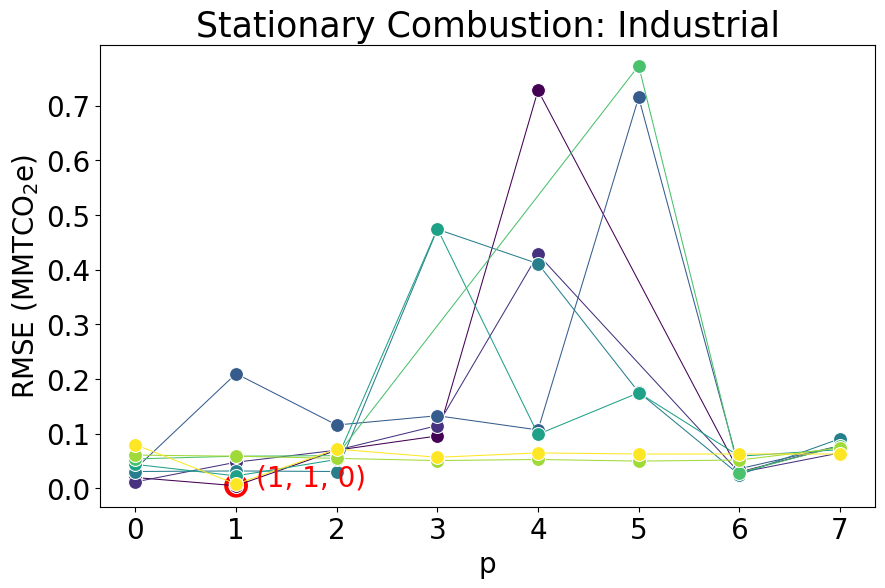

In [14]:
import seaborn as sns

NHM['RMSE'] = pd.to_numeric(NHM['RMSE'], errors='coerce')

# Check for non-numeric values in 'RMSE' column
non_numeric_values = NHM['RMSE'][NHM['RMSE'].apply(lambda x: not np.issubdtype(type(x), np.number))]
plt.figure(figsize=(10, 6))

# Using seaborn scatterplot to plot data with different sizes and colors for d and q
sns.lineplot(
    data=NHM,
    x='p', 
    y='RMSE', 
    size='d', 
    hue='q', 
    palette='viridis', 
    markers=True,
    style='d',
    legend=False,
    markersize=10
)

# Adding labels and title
plt.title('Stationary Combustion: Industrial',fontsize =25)
plt.xlabel('p',fontsize=20)
plt.ylabel('RMSE (MMTCO$_2$e)',fontsize=20)

plt.xticks(range(8), fontsize=20)

# # Customize the y-ticks
y_ticks = np.arange(0, 40, 5)  # Create y-ticks with a step of 0.5
plt.yticks(ticks=y_ticks, fontsize=20)  # Set y-ticks and their fontsize

maximum = NHM['RMSE'].max()
y_ticks = np.arange(0, maximum, 0.1)  # Create y-ticks with a step of 0.02
plt.yticks(ticks=y_ticks, fontsize=20)  # Set y-ticks and their fontsize

highlight = NHM.loc[1, 1, 0]
p, d, q = 1, 1, 0  # The index values for annotation
plt.scatter(p, highlight['RMSE'], facecolors='none', edgecolors='red', s=200, linewidth=3)
plt.text(p + 0.2, highlight['RMSE'], f'({p}, {d}, {q})', fontsize=20, color='red')

plt.savefig('../../../figures/rmse-plot/stationary_industrial_emissions_NHM.jpg', dpi=600, bbox_inches='tight')

In [15]:
test_BSN =results_df_BSN_cv.set_index(['p','d','q'])#.loc[:,'RMSE'].idxmin()
sorted_BSN = test_BSN.sort_values(by='RMSE').iloc[:60,:]
BSN = sorted_BSN.applymap(lambda x: f'{x:.3f}')
BSN

,,,MAPE,MAE,RMSE,BIC
p,d,q,,,,
3,1,2,3.158,0.003,0.004,-39.242
2,1,1,3.709,0.004,0.004,-50.646
0,1,2,3.699,0.004,0.004,-44.165
3,1,1,3.771,0.004,0.005,-41.077
1,1,1,4.356,0.005,0.005,-51.692
0,1,5,4.269,0.005,0.005,-19.636
3,1,4,4.129,0.005,0.005,-22.019
1,1,6,4.639,0.005,0.005,-20.196
0,1,6,4.737,0.005,0.005,-16.747


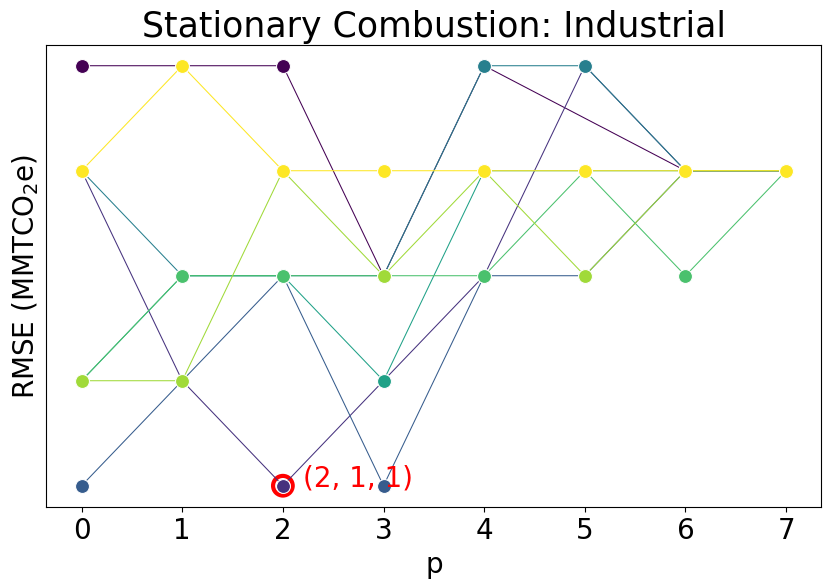

In [16]:
import seaborn as sns

BSN['RMSE'] = pd.to_numeric(BSN['RMSE'], errors='coerce')

# Check for non-numeric values in 'RMSE' column
non_numeric_values = BSN['RMSE'][BSN['RMSE'].apply(lambda x: not np.issubdtype(type(x), np.number))]
plt.figure(figsize=(10, 6))

# Using seaborn scatterplot to plot data with different sizes and colors for d and q
sns.lineplot(
    data=BSN,
    x='p', 
    y='RMSE', 
    size='d', 
    hue='q', 
    palette='viridis', 
    markers=True,
    style='d',
    legend=False,
    markersize=10
)

# Adding labels and title
plt.title('Stationary Combustion: Industrial',fontsize =25)
plt.xlabel('p',fontsize=20)
plt.ylabel('RMSE (MMTCO$_2$e)',fontsize=20)

plt.xticks(range(8), fontsize=20)

# # Customize the y-ticks
y_ticks = np.arange(0, 40, 5)  # Create y-ticks with a step of 0.5
plt.yticks(ticks=y_ticks, fontsize=20)  # Set y-ticks and their fontsize

maximum = BSN['RMSE'].max()
y_ticks = np.arange(0, maximum, 0.01)  # Create y-ticks with a step of 0.02
plt.yticks(ticks=y_ticks, fontsize=20)  # Set y-ticks and their fontsize

highlight = BSN.loc[2, 1, 1]
p, d, q = 2, 1, 1  # The index values for annotation
plt.scatter(p, highlight['RMSE'], facecolors='none', edgecolors='red', s=200, linewidth=3)
plt.text(p + 0.2, highlight['RMSE'], f'({p}, {d}, {q})', fontsize=20, color='red')

plt.savefig('../../../figures/rmse-plot/stationary_industrial_emissions_BSN.jpg', dpi=600, bbox_inches='tight')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     Hartford emissions (MMTCO2e)   No. Observations:                   13
Model:                           ARIMA(1, 1, 4)   Log Likelihood                  16.199
Date:                          Mon, 01 Jul 2024   AIC                            -20.398
Time:                                  13:52:45   BIC                            -20.723
Sample:                              01-01-2010   HQIC                           -24.409
                                   - 01-01-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6212      0.681      0.912      0.362      -0.714       1.956
ma.L1         -3.7112      8.661     -0.428      0.668     -20.687      13.265
ma.L2          2.8347      8.437      0.336      0.737     -13.701      19.371
ma.L3          8.9292      3.708      2.408      0.016       1.662      16.197
ma.L4         -6.0820      5.298     -1.148      0.251     -16.466       4.302
sigma2      5.417e-06   2.09e-06      2.591      0.010    1.32e-06    9.52e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.94
Prob(Q):                              0.64   Prob(JB):                         0.23
Heteroskedasticity (H):               0.04   Skew:                             1.49
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.2e+17. Standard errors may be unstable.
"""

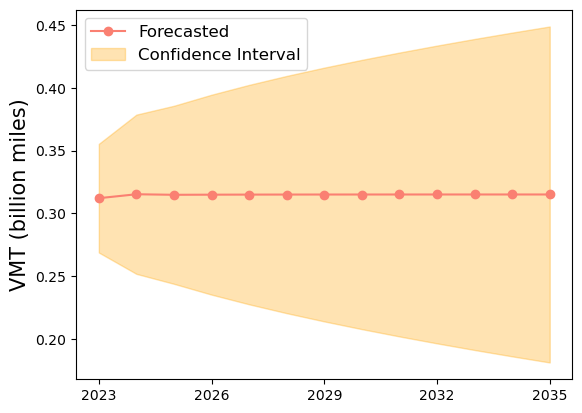

In [17]:
def arima_forecast(train, test, order,forecast_horizon,plot_file,color1,color2):
    # Fit the SARIMA model with the optimal parameters
    mod = sm.tsa.arima.ARIMA(train, order=order,enforce_stationarity= False, enforce_invertibility= False, concentrate_scale=False)
    #what are existing forecasting, few slides 
    res = mod.fit()

    forecast = res.forecast(steps=forecast_horizon)

    # Calculate the confidence interval
    forecast_object = res.get_forecast(steps=forecast_horizon)
    confidence_interval = forecast_object.conf_int()

    forecast.index = range(2023, 2023 + forecast_horizon)
    plt.plot(forecast.index, forecast, marker='o', color=color1, label='Forecasted')

    # Plot the confidence interval
    plt.fill_between(forecast.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color=color2, alpha=0.3, label='Confidence Interval')

    plt.ylabel('VMT (billion miles)', fontsize=15)
    plt.legend(fontsize=12, loc='upper left')

    # Define the interval between x-ticks
    x_tick_interval = 3 # Change this value to set the desired interval

# Set x-ticks with the specified interval
    plt.xticks(range(2023, 2023 + forecast_horizon, x_tick_interval))

    # Save the plot
    plt.savefig(plot_file)

    return res,forecast,confidence_interval

HEM_train = df_train['Hartford emissions (MMTCO2e)']
HEM_test = df_test['Hartford emissions (MMTCO2e)']
HEM_data = df_flipped['Hartford emissions (MMTCO2e)']
plot_file = '../../../figures/hartford-forecast-emissions-industrial.png'  # File to save the plot

HEM_summary,HEM_forecast,HEM_confidence_interval=arima_forecast(HEM_data, HEM_test,(1,1,4),13, plot_file,'salmon','orange')
HEM_summary.summary()

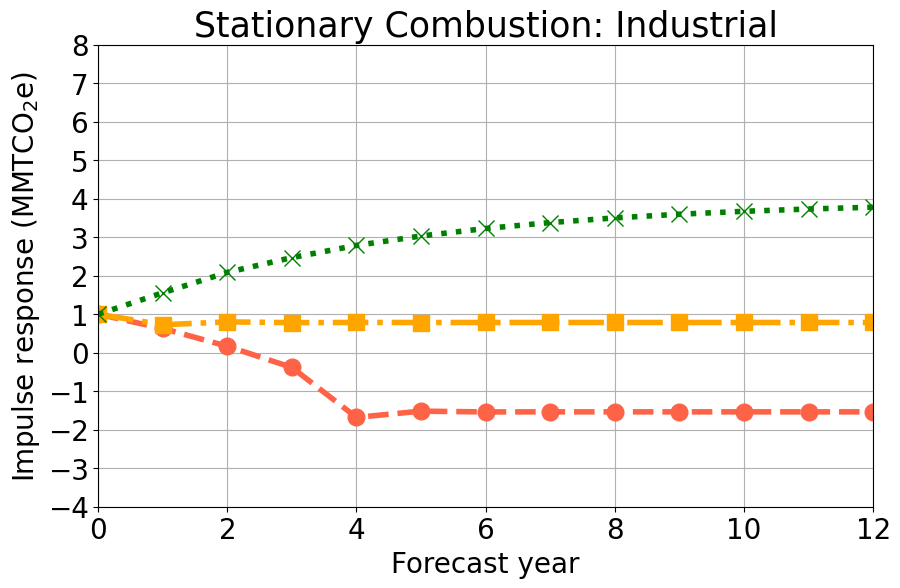

In [18]:
import matplotlib.pyplot as plt

def arima_forecast_1(train, order, forecast_horizon, plot_file, color1, color2):
    # Fit the ARIMA model with the specified order
    mod = sm.tsa.arima.ARIMA(train, order=order, enforce_stationarity=False, enforce_invertibility=False, concentrate_scale=False)
    res = mod.fit()
    
    # Forecasting
    forecast = res.forecast(steps=forecast_horizon)
    forecast.index = range(2023, 2023 + forecast_horizon)

    # Calculate the confidence interval
    forecast_object = res.get_forecast(steps=forecast_horizon)
    confidence_interval = forecast_object.conf_int()

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(forecast.index, forecast, marker='o', color=color1, label='Forecasted')
    plt.fill_between(forecast.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color=color2, alpha=0.3, label='Confidence Interval')
    plt.ylabel('VMT (billion miles)', fontsize=15)
    plt.legend(fontsize=12, loc='upper left')

    # Define the interval between x-ticks
    x_tick_interval = 3
    plt.xticks(range(2023, 2023 + forecast_horizon, x_tick_interval))
    
    # Save the forecast plot
    plt.savefig(plot_file)
    plt.close()
    
    # Impulse Response Calculation
    impulse_responses = res.impulse_responses(steps=forecast_horizon, impulse=0, orthogonalized=False, cumulative=False, anchor='end')
    
    # Ensure the length of impulse_responses matches the forecast_horizon
    impulse_responses = impulse_responses[:forecast_horizon]
    
    return res, forecast, confidence_interval, impulse_responses

def plot_multiple_irfs(irf_data, forecast_horizon, start_year, plot_file):
    plt.figure(figsize=(10, 6))
    
    for region, irf in irf_data.items():
        plt.plot(
            range(0, forecast_horizon),
            irf['impulse_responses'],
            marker=irf.get('marker', 'o'),  # default marker if 'marker' key is missing
            label=f'{region}',
            color=irf.get('color', None),  # default color if 'color' key is missing
            linestyle=irf.get('linestyle', '-'),  # default linestyle if 'linestyle' key is missing
            linewidth=irf.get('linewidth', 2),  # default linewidth if 'linewidth' key is missing
            alpha=irf.get('alpha', 0.7),  # default alpha if 'alpha' key is missing
            markersize=irf.get('markersize', 6)  # default markersize if 'markersize' key is missing
        )
    
    #plt.xlabel('Year', fontsize=20)
    plt.ylabel('Impulse response (MMTCO$_2$e)', fontsize=20)
    plt.xlabel('Forecast year', fontsize=20)
    #plt.legend(fontsize=12)
    plt.title('Stationary Combustion: Industrial', fontsize=25)
    plt.grid(True)
    
     # Set x-ticks to display years from the start year
    plt.xticks(range(0, forecast_horizon, 2))
    plt.xticks(fontsize=20)
    
    plt.xticks(fontsize=20) 
    # Set y-ticks to be integers
    max_y = 8  # Replace with your actual maximum value if different
    plt.yticks(range(-4, max_y + 1))
    
    plt.ylim(-4, 8)
    plt.yticks(fontsize=20)
    
    # Adjust the spacing and save the plot
    plt.margins(x=0, y=0)
    plt.savefig(plot_file, dpi=600, bbox_inches='tight')

# Assuming df is your DataFrame and it contains columns for each region
regions = {
    'Hartford': {
       'data': df['Hartford emissions (MMTCO2e)'],
        'order': (1, 1,4),
        'color': 'tomato',
        'marker': 'o',
        'linestyle': '--',
        'linewidth': 4,
        'alpha': 1,
        'markersize': 12
    },
    'New Haven': {
        'data': df['New Haven emissions (MMTCO2e)'],
        'order': (1,1,0),
        'color': 'orange',
        'marker': 's',
        'linestyle': '-.',
        'linewidth': 4,
        'alpha': 1,
        'markersize': 12
    },
    'Bridgeport': {
        'data': df['Bridgeport emissions (MMTCO2e)'],
        'order': (2,1,1),
        'color': 'green', 
        'marker': 'x',
        'linestyle': ':',
        'linewidth': 4,
        'alpha': 1,
        'markersize': 12
    }
}


forecast_horizon = 13
start_year = 2023
irf_data = {}

for region, params in regions.items():
    plot_file = f'../../../figures/{region.lower().replace(" ", "")}-forecast-vmt.png'
    summary, forecast, confidence_interval, impulse_responses = arima_forecast_1(params['data'], params['order'], forecast_horizon, plot_file, params['color'], params['color'])
    irf_data[region] = {
        'impulse_responses': impulse_responses,
        'color': params['color'],
        'marker': params['marker'],  # Adding marker information
        'linestyle': params['linestyle'],  # Adding linestyle information
        'linewidth': params['linewidth'],  # Adding linewidth information
        'alpha': params['alpha'],  # Adding alpha information
        'markersize': params['markersize']
    }

# Plot all impulse response functions together
irf_plot_file = '../../../figures/impulse-function/industrial-IRF.jpg'
plot_multiple_irfs(irf_data, forecast_horizon, start_year, irf_plot_file)
    


In [19]:
def arima_test_data_performance_metrics(train, test, order):
    # Fit the SARIMA model with the optimal parameters
    mod = sm.tsa.arima.ARIMA(train, order=order,enforce_stationarity= False, enforce_invertibility= False, concentrate_scale=False)
    #what are existing forecasting, few slides 
    res = mod.fit()

    test_forecast = res.get_prediction(start=len(train), end=len(train)+len(test)-1)
    test_forecast_mean = test_forecast.predicted_mean

    new_index = range(2023-len(test),2023)
    test_forecast_df = pd.DataFrame(list(test_forecast_mean.items()), columns=['Year', 'Emissions (MMTCO2e)'])
    test_forecast_df['Year'] = new_index


    # Set the 'Year' column as the index
    test_forecast_df.set_index('Year', inplace=True)
    
    test_forecast_df.index = pd.to_datetime(test_forecast_df.index, format='%Y')


    actual_values = test
    predicted_values = test_forecast_df['Emissions (MMTCO2e)']

    mae = mean_absolute_error(actual_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

    return mae, rmse, mape

HEM_train = df_train['Hartford emissions (MMTCO2e)']
HEM_test = df_test['Hartford emissions (MMTCO2e)']
mae, rmse, mape = arima_test_data_performance_metrics(HEM_train, HEM_test,(1,0,3))
print(mae)
print(rmse)
print(mape)

0.00252752306073023
0.003235287786971525
0.8036616356155537


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     New Haven emissions (MMTCO2e)   No. Observations:                   13
Model:                            ARIMA(1, 1, 0)   Log Likelihood                  18.919
Date:                           Mon, 01 Jul 2024   AIC                            -33.837
Time:                                   13:52:46   BIC                            -33.042
Sample:                               01-01-2010   HQIC                           -34.339
                                    - 01-01-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2539      0.927     -0.274      0.784      -2.071       1.563
sigma2         0.0019      0.001      2.693      0.007       0.001       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.68   Prob(JB):                         0.14
Heteroskedasticity (H):              22.60   Skew:                             1.46
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

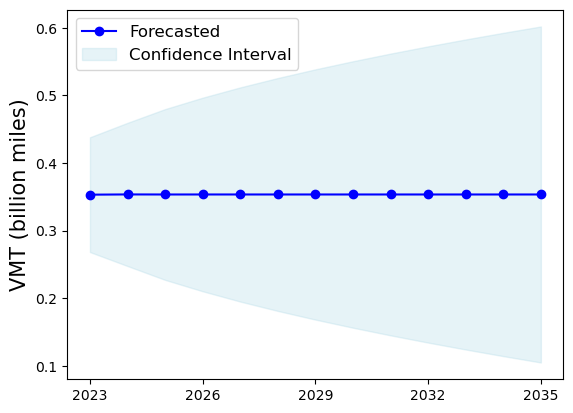

In [20]:
NHM_train = df_train['New Haven emissions (MMTCO2e)']
NHM_test = df_test['New Haven emissions (MMTCO2e)']
NHM_data = df_flipped['New Haven emissions (MMTCO2e)']
plot_file = '../../../figures/newhaven-forecast-emissions-industrial.png'  # File to save the plot

summary, NHM_forecast,NHM_confidence_interval=arima_forecast(NHM_data, NHM_test, (1,1,0),13, plot_file,'blue','lightblue')
summary.summary()

In [21]:
summary.pvalues

ar.L1     0.784183
sigma2    0.007075
dtype: float64

In [22]:
NHM_train = df_train['New Haven emissions (MMTCO2e)']
NHM_test = df_test['New Haven emissions (MMTCO2e)']
mae, rmse, mape = arima_test_data_performance_metrics(NHM_train, NHM_test,(1,1,0))
print(mae, rmse, mape)

0.003710588785181527 0.004575501317636115 1.0648850267811427


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Bridgeport emissions (MMTCO2e)   No. Observations:                   13
Model:                             ARIMA(2, 1, 1)   Log Likelihood                  41.555
Date:                            Mon, 01 Jul 2024   AIC                            -75.111
Time:                                    13:52:46   BIC                            -73.901
Sample:                                01-01-2010   HQIC                           -76.439
                                     - 01-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1148      0.422      0.272      0.785      -0.712       0.941
ar.L2         -0.0580      0.166     -0.350      0.727      -0.383       0.267
ma.L1         -1.1611      1.272     -0.913      0.361      -3.654       1.332
sigma2      9.337e-06   1.57e-05      0.593      0.553   -2.15e-05    4.02e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.85   Prob(JB):                         0.66
Heteroskedasticity (H):               6.03   Skew:                            -0.54
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

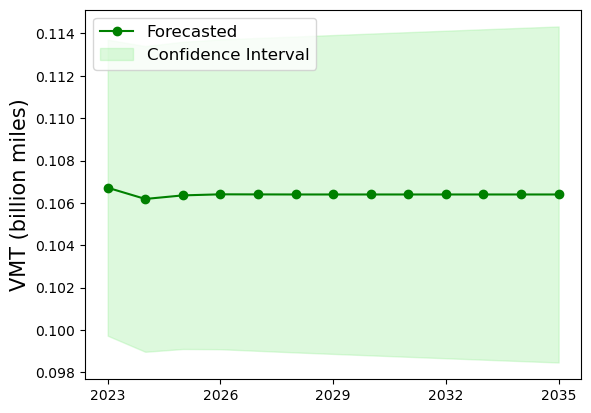

In [23]:
BSN_train = df_train['Bridgeport emissions (MMTCO2e)']
BSN_test = df_test['Bridgeport emissions (MMTCO2e)']
BSN_data = df_flipped['Bridgeport emissions (MMTCO2e)']
plot_file = '../../../figures/bridgeport-forecast-emissions-industrial.png'  # File to save the plot

summary, BSN_forecast,BSN_confidence_interval=arima_forecast(BSN_data, BSN_test,(2,1,1),13, plot_file,'green','lightgreen')#chagne the function name. make function shorter; call old function in new function
summary.summary()

In [24]:
summary.pvalues

ar.L1     0.785469
ar.L2     0.726629
ma.L1     0.361339
sigma2    0.553238
dtype: float64

In [25]:
mae, rmse, mape = arima_test_data_performance_metrics(BSN_train, BSN_test,(1,0,0))
print(mae,rmse, mape)

0.004300289465165248 0.004460208235675893 3.933540994205421


In [26]:
def test_train_fitting_VMT(train,order):
    # Forecast on training data
    mod = sm.tsa.arima.ARIMA(train, order=order)
    res = mod.fit()
    
    train_forecast = res.get_prediction(start=0, end=len(train)-1)
    train_forecast_mean = train_forecast.predicted_mean.iloc[1:]
    train_conf_int = train_forecast.conf_int().iloc[1:]

    #test_forecast = res.get_prediction(start=len(train), end=len(train)+len(test)-1)
    #test_forecast_mean = test_forecast.predicted_mean
    #test_conf_int = test_forecast.conf_int()
    
    return train_forecast_mean,train_conf_int
    

emissions_train_HEM,train_conf_int_HEM=test_train_fitting_VMT(HEM_data,(1,1,4))
emissions_train_NHM,train_conf_int_NHM=test_train_fitting_VMT(NHM_data,(1,1,0))
emissions_train_BSN,train_conf_int_BSN=test_train_fitting_VMT(BSN_data,(2,1,1))

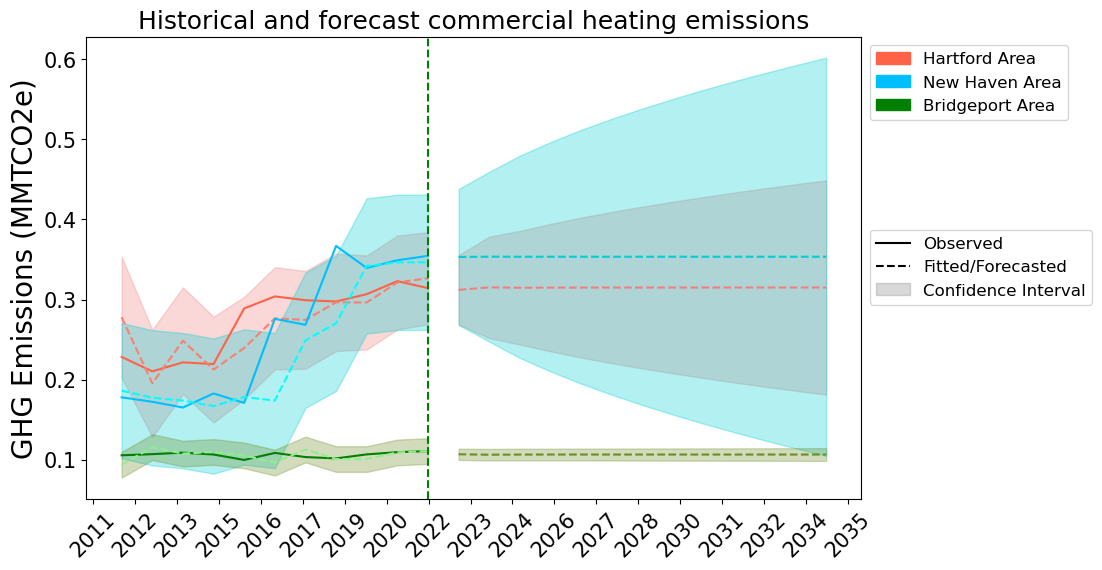

In [27]:
plt.figure(figsize=(10, 6))


concatenated_observed_HEM = pd.concat([HEM_train,HEM_test])[2:]
concatenated_predicted_HEM = emissions_train_HEM[1:]
HEM_forecast.index = pd.to_datetime(HEM_forecast.index, format='%Y')
plt.plot(concatenated_observed_HEM.index, concatenated_observed_HEM,label='Hartford_Observed', color='tomato')
plt.plot(concatenated_predicted_HEM.index, concatenated_predicted_HEM, label='Hartford_Fitted', color='salmon', linestyle='--')

plt.plot(HEM_forecast.index, HEM_forecast, color='lightcoral', label='Hartford_Forecasted',linestyle='--')
plt.fill_between(HEM_forecast.index, HEM_confidence_interval.iloc[:, 0], HEM_confidence_interval.iloc[:, 1], color='lightcoral', alpha=0.3)
plt.fill_between(emissions_train_HEM[1:].index, train_conf_int_HEM.iloc[1:, 0], train_conf_int_HEM.iloc[1:, 1], color='lightcoral', alpha=0.3)


concatenated_observed_NHM = pd.concat([NHM_train,NHM_test])[2:]
concatenated_predicted_NHM = emissions_train_NHM[1:]
NHM_forecast.index = pd.to_datetime(NHM_forecast.index, format='%Y')
plt.plot(concatenated_observed_NHM.index, concatenated_observed_NHM,label='New Haven_Observed', color='deepskyblue')
plt.plot(concatenated_predicted_NHM.index, concatenated_predicted_NHM, label='New Haven_Fitted', color='cyan', linestyle='--')

plt.plot(NHM_forecast.index, NHM_forecast, color='darkturquoise', label='New Haven_Forecasted',linestyle='--')
plt.fill_between(NHM_forecast.index, NHM_confidence_interval.iloc[:, 0], NHM_confidence_interval.iloc[:, 1], color='darkturquoise', alpha=0.3)
plt.fill_between(emissions_train_NHM[1:].index, train_conf_int_NHM.iloc[1:, 0], train_conf_int_NHM.iloc[1:, 1], color='darkturquoise', alpha=0.3)

concatenated_observed_BSN = pd.concat([BSN_train,BSN_test])[2:]
concatenated_predicted_BSN = emissions_train_BSN[1:]
BSN_forecast.index = pd.to_datetime(BSN_forecast.index, format='%Y')
plt.plot(concatenated_observed_BSN.index, concatenated_observed_BSN,label='Bridgeport_Observed', color='green')
plt.plot(concatenated_predicted_BSN.index, concatenated_predicted_BSN, label='Bridgeport_Fitted', color='lightgreen', linestyle='--')

plt.plot(BSN_forecast.index, BSN_forecast, color='olivedrab', label='Bridgeport_Forecasted',linestyle='--')
plt.fill_between(BSN_forecast.index, BSN_confidence_interval.iloc[:, 0], BSN_confidence_interval.iloc[:, 1], color='olivedrab', alpha=0.3)
plt.fill_between(emissions_train_BSN[1:].index, train_conf_int_BSN.iloc[1:, 0], train_conf_int_BSN.iloc[1:, 1], color='olivedrab', alpha=0.3)


# Legend for Colors (Locations)
tomato_patch = mpatches.Patch(color='tomato', label='Hartford Area')
deepskyblue_patch = mpatches.Patch(color='deepskyblue', label='New Haven Area')
green_patch = mpatches.Patch(color='green', label='Bridgeport Area')
color_legend = plt.legend(handles=[tomato_patch, deepskyblue_patch, green_patch], title="", fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Add the first legend manually to the plot
plt.gca().add_artist(color_legend)

# Legend for Patterns (Data Types)
solid_line = mlines.Line2D([], [], color='black', label='Observed')
dashed_line = mlines.Line2D([], [], color='black', linestyle='--', label='Fitted/Forecasted')
alpha_patch = mpatches.Patch(color='grey', alpha=0.3, label='Confidence Interval')
plt.legend(handles=[solid_line, dashed_line, alpha_patch], title="", fontsize=12, loc='upper left', bbox_to_anchor=(1, 0.6))

# Title, labels, ticks, and other plot formatting as per your code
plt.title('Historical and forecast commercial heating emissions', fontsize=18)
plt.ylabel('GHG Emissions (MMTCO2e)', fontsize=20)

plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add a vertical line at the x-axis for the year 2016
plt.axvline(x=datetime.datetime(2022, 1, 1), color='green', linestyle='--', label='Year 2022 (X-axis)')


plt.savefig('../../../figures/industrial_forecast.png', dpi=600, bbox_inches='tight')

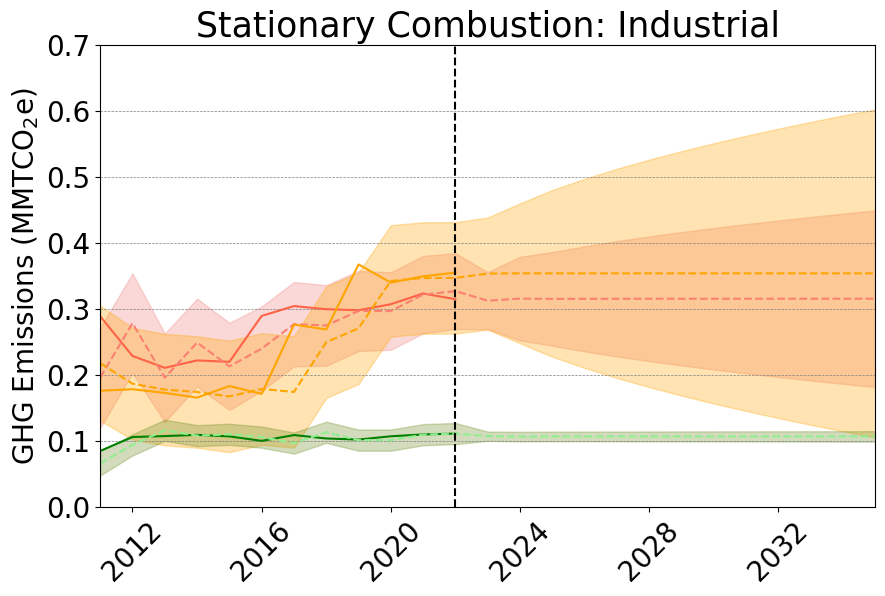

In [35]:
plt.figure(figsize=(10, 6))


concatenated_observed_HEM = pd.concat([HEM_train,HEM_test])[1:]
HEM_forecast.index = pd.to_datetime(HEM_forecast.index, format='%Y')
concatenated_predicted_forecast_HEM = pd.concat([emissions_train_HEM,HEM_forecast])

plt.plot(concatenated_observed_HEM.index, concatenated_observed_HEM,label='Hartford_Observed', color='tomato')
plt.plot(concatenated_predicted_forecast_HEM.index, concatenated_predicted_forecast_HEM, label='Hartford_Fitted', color='salmon', linestyle='--')

concatenated_confidence_interval_HEM = pd.concat([train_conf_int_HEM, HEM_confidence_interval])
plt.fill_between(concatenated_confidence_interval_HEM.index, concatenated_confidence_interval_HEM.iloc[:, 0], concatenated_confidence_interval_HEM.iloc[:, 1], color='lightcoral', alpha=0.3)



concatenated_observed_NHM = pd.concat([NHM_train,NHM_test])[1:]
NHM_forecast.index = pd.to_datetime(NHM_forecast.index, format='%Y')
concatenated_predicted_forecast_NHM = pd.concat([emissions_train_NHM,NHM_forecast])

plt.plot(concatenated_observed_NHM.index, concatenated_observed_NHM,label='New Haven_Observed', color='orange')
plt.plot(concatenated_predicted_forecast_NHM.index, concatenated_predicted_forecast_NHM, label='New Haven_Fitted', color='orange', linestyle='--')

concatenated_confidence_interval_NHM = pd.concat([train_conf_int_NHM, NHM_confidence_interval])
plt.fill_between(concatenated_confidence_interval_NHM.index, concatenated_confidence_interval_NHM.iloc[:, 0], concatenated_confidence_interval_NHM.iloc[:, 1], color='orange', alpha=0.3)


concatenated_observed_BSN = pd.concat([BSN_train,BSN_test])[1:]
BSN_forecast.index = pd.to_datetime(BSN_forecast.index, format='%Y')
concatenated_predicted_forecast_BSN = pd.concat([emissions_train_BSN,BSN_forecast])

plt.plot(concatenated_observed_BSN.index, concatenated_observed_BSN,label='Bridgeport_Observed', color='green')
plt.plot(concatenated_predicted_forecast_BSN.index, concatenated_predicted_forecast_BSN, label='Bridgeport_Fitted', color='lightgreen', linestyle='--')

concatenated_confidence_interval_BSN = pd.concat([train_conf_int_BSN, BSN_confidence_interval])
plt.fill_between(concatenated_confidence_interval_BSN.index, concatenated_confidence_interval_BSN.iloc[:, 0], concatenated_confidence_interval_BSN.iloc[:, 1], color='olivedrab', alpha=0.3)


# # Legend for Colors (Locations)
# tomato_patch = mpatches.Patch(color='tomato', label='Hartford Area')
# deepskyblue_patch = mpatches.Patch(color='orange', label='New Haven Area')
# green_patch = mpatches.Patch(color='green', label='Bridgeport Area')
# color_legend = plt.legend(handles=[tomato_patch, deepskyblue_patch, green_patch], title="", fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# # Add the first legend manually to the plot
# plt.gca().add_artist(color_legend)

# # Legend for Patterns (Data Types)
# solid_line = mlines.Line2D([], [], color='black', label='Observed')
# dashed_line = mlines.Line2D([], [], color='black', linestyle='--', label='Fitted/Forecasted')
# alpha_patch = mpatches.Patch(color='grey', alpha=0.3, label='Confidence Interval')
# plt.legend(handles=[solid_line, dashed_line, alpha_patch], title="", fontsize=12, loc='upper left', bbox_to_anchor=(1, 0.6))

# Title, labels, ticks, and other plot formatting as per your code
plt.title('Stationary Combustion: Industrial', fontsize=25)
plt.ylabel('GHG Emissions (MMTCO$_2$e)', fontsize=20)

plt.xticks(fontsize=20, rotation=45) 
plt.yticks(fontsize=20)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=20))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add a vertical line at the x-axis for the year 2016
plt.axvline(x=datetime.datetime(2022, 1, 1), color='black', linestyle='--', label='Year 2022 (X-axis)')

# Hide the grid lines behind the line plot
plt.grid(axis='y', linestyle='--', color='gray', linewidth=0.5, zorder=1)

plt.xlim(datetime.datetime(2011, 1, 1), datetime.datetime(2035, 1, 1))


max_y_value = 0.8
plt.yticks(np.arange(0, max_y_value, 0.1))


plt.savefig('../../../figures/forecast/industrial_forecast.png', dpi=600, bbox_inches='tight')

In [36]:
concatenated_predicted_forecast_HEM.to_csv('../../../results/predictions/industrial-emissions-prediction-HEM.csv')
concatenated_predicted_forecast_NHM.to_csv('../../../results/predictions/industrial-emissions-prediction-NHM.csv')
concatenated_predicted_forecast_BSN.to_csv('../../../results/predictions/industrial-emissions-prediction-BSN.csv')

In [29]:
concatenated_predicted_forecast_HEM.index = pd.to_datetime(concatenated_predicted_forecast_HEM.index)
concatenated_observed_HEM.index = pd.to_datetime(concatenated_observed_HEM.index)

# Extract data for the year 2021
HEM_2021 = concatenated_observed_HEM['2021'].values
HEM_2035 = concatenated_predicted_forecast_HEM['2035'].values


concatenated_predicted_forecast_NHM.index = pd.to_datetime(concatenated_predicted_forecast_NHM.index)
concatenated_observed_NHM.index = pd.to_datetime(concatenated_observed_NHM.index)

NHM_2021 = concatenated_observed_NHM['2021'].values
NHM_2035= concatenated_predicted_forecast_NHM['2035'].values


concatenated_predicted_forecast_BSN.index = pd.to_datetime(concatenated_predicted_forecast_BSN.index)
concatenated_observed_BSN.index = pd.to_datetime(concatenated_observed_BSN.index)

# Extract data for the year 2021
BSN_2021 = concatenated_observed_BSN['2021'].values
BSN_2035= concatenated_predicted_forecast_BSN['2035'].values


#how to calculate the difference: the difference equals the (old-new)/old
NHM_per = (NHM_2021-NHM_2035)/NHM_2021*100 #%

HEM_per = (HEM_2021-HEM_2035)/HEM_2021*100 #%

BSN_per = (BSN_2021-BSN_2035)/BSN_2021*100 #%

print(HEM_per,NHM_per,BSN_per)

[2.45661264] [-1.26640917] [2.71733624]


In [30]:
df = pd.DataFrame({'Column1': -HEM_per, 'Column2': -NHM_per, 'Column3': -BSN_per})
df

,Column1,Column2,Column3
0,-2.456613,1.266409,-2.717336


In [31]:
data = pd.DataFrame({'Column1': HEM_2021, 'Column2': HEM_2035, 'Column3': NHM_2021, 'Column4': NHM_2035, 'Column5': BSN_2021, 'Column6': BSN_2035})
data

,Column1,Column2,Column3,Column4,Column5,Column6
0,0.322936,0.315003,0.348998,0.353418,0.10937,0.106398


In [32]:
concatenated_confidence_interval_HEM['ME'] = (concatenated_confidence_interval_HEM.iloc[:, 1] - concatenated_confidence_interval_HEM.iloc[:, 0]) / 2
concatenated_confidence_interval_HEM

,lower Hartford emissions (MMTCO2e),upper Hartford emissions (MMTCO2e),ME
2011-01-01,0.119408,0.271316,0.075954
2012-01-01,0.202411,0.353338,0.075463
2013-01-01,0.128373,0.262252,0.066939
2014-01-01,0.182028,0.315215,0.066594
2015-01-01,0.146433,0.278576,0.066072
2016-01-01,0.175519,0.303301,0.063891
2017-01-01,0.212698,0.340331,0.063816
2018-01-01,0.213501,0.335565,0.061032
2019-01-01,0.235711,0.357260,0.060774
2020-01-01,0.237610,0.355019,0.058704


In [33]:
concatenated_confidence_interval_NHM['ME'] = (concatenated_confidence_interval_NHM.iloc[:, 1] - concatenated_confidence_interval_NHM.iloc[:, 0]) / 2
concatenated_confidence_interval_NHM

,lower New Haven emissions (MMTCO2e),upper New Haven emissions (MMTCO2e),ME
2011-01-01,0.130132,0.304828,0.087348
2012-01-01,0.101749,0.270719,0.084485
2013-01-01,0.092794,0.261764,0.084485
2014-01-01,0.089223,0.258194,0.084485
2015-01-01,0.082458,0.251428,0.084485
2016-01-01,0.093735,0.262705,0.084485
2017-01-01,0.089354,0.258324,0.084485
2018-01-01,0.164679,0.333650,0.084485
2019-01-01,0.185813,0.354784,0.084485
2020-01-01,0.257427,0.426398,0.084485


In [34]:
concatenated_confidence_interval_BSN['ME'] = (concatenated_confidence_interval_BSN.iloc[:, 1] - concatenated_confidence_interval_BSN.iloc[:, 0]) / 2
concatenated_confidence_interval_BSN

,lower Bridgeport emissions (MMTCO2e),upper Bridgeport emissions (MMTCO2e),ME
2011-01-01,0.047169,0.083839,0.018335
2012-01-01,0.077525,0.109602,0.016038
2013-01-01,0.099604,0.131681,0.016038
2014-01-01,0.091499,0.123576,0.016038
2015-01-01,0.093579,0.125656,0.016038
2016-01-01,0.089255,0.121332,0.016038
2017-01-01,0.080294,0.112371,0.016038
2018-01-01,0.096637,0.128714,0.016038
2019-01-01,0.084693,0.116770,0.016038
2020-01-01,0.084704,0.116781,0.016038
